# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The dataset is located [here](https://drive.google.com/file/d/1z1gYSD32ktbHuKSzB5JVS_u4YsLibh5F/view?usp=sharing), please download it and place it in the data folder.

In [4]:
# loading the data:

customer = pd.read_csv('../data/Wholesale_customer_data.csv')
 
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
customer.dtypes

# All columns have interger values and there are no object values

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
customer.isna().sum()
# There are no missing values in the columns

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
customer.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [8]:
customer.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# Removing outliers from the dataframe
# This should remove the entire row of the dataframe wherever there is an outlier
# Reference: https://kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python

from scipy.stats import zscore

# Calculate z-score of the dataframe
z_scores = stats.zscore(customer)

# Calculate the absolute value element-wise.
# np.abs is a shorthand for this function.
# Call numpy.abs(x) with x as the previous result to convert each element in x to its absolute value.

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
customer = customer[filtered_entries]

customer

#Paolo: interesting way to remove outliers but it is a dangerous one because here you apply 
# it blindly without even looking at the data. My advice before removing any data is to 
# first visualize
# the data to geta  feeling of what is going on.You could use pariplot for example to plot
# the entire dataframe and have a look.
# In this particular case, since I do not know much about how the data, I miss domain expertise,
# I would be very careful before removing them, always giving a reasoning why I would want
# to remove them


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [34]:
# Calculating Skew
# Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

customer.skew(axis = 0) 


Channel             0.804392
Region             -1.300303
Fresh               1.355242
Milk                1.729593
Grocery             1.545745
Frozen              2.134815
Detergents_Paper    1.873763
Delicassen          2.049961
labels              0.303847
labels_DBSCAN       1.749326
dtype: float64

In [35]:
# OBSERVATIONS:

# 1.What does each column mean?
# A. Each column indicates the type of item the customer is buying


# 2.Any categorical data to convert?
# A.There is no categorical data to convert

# 3.Any missing data to remove?
# A.There are no missing values in the df


# 4.Column collinearity - any high correlations?
# A.There is no high collinearity between the different columns

# 5.Descriptive statistics - any outliers to remove?
# A.There seemed to be quite a few outliers. I removed all the outliers.


# 6.Column-wise data distribution - is the distribution skewed?
# A. All columns had a positive skew except Column "Region" which had a negative skew.
#Paolo: ok!

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [36]:
# I already cleaned the data by removing all all the outliers.
# So, I dont have to perform any additional cleaning/transformation.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [37]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
scaled_customer = scaler.fit_transform(customer)
scaled_customer = pd.DataFrame(scaled_customer)
scaled_customer

,0,1,2,3,4,5,6,7,8,9
0,1.478044,0.587722,0.199569,1.051409,0.115837,-0.801844,0.093798,0.082291,0.613280,-0.454969
1,1.478044,0.587722,-0.372655,1.085254,0.427079,-0.270462,0.286944,0.442510,0.613280,-0.454969
2,1.478044,0.587722,-0.444438,0.865042,0.134911,-0.049739,0.356526,5.432937,0.613280,-0.454969
3,-0.676570,0.587722,0.260340,-0.807866,-0.402125,1.322997,-0.582369,0.452379,1.195614,-0.454969
4,1.478044,0.587722,1.213706,0.118255,0.059543,0.468598,-0.186092,3.246130,0.613280,-0.454969
...,...,...,...,...,...,...,...,...,...,...
409,-0.676570,0.587722,1.936429,1.577764,1.428729,3.633548,-0.683778,0.794505,1.195614,-0.454969
410,-0.676570,0.587722,2.907639,-0.756220,-0.938230,0.672844,-0.711549,0.911288,1.777948,-0.454969
411,1.478044,0.587722,0.389426,2.333122,3.633321,-0.725295,3.890255,0.517350,-0.551389,-0.454969
412,-0.676570,0.587722,-0.043004,-0.635345,-0.710575,-0.518989,-0.688147,0.729534,-1.133723,-0.454969


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [38]:
# Your code here:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# n_clusters: The number of clusters to form as well as the number of centroids to generate.
# By default n_clusters=8

from sklearn.cluster import KMeans

customer_kmeans = KMeans().fit(scaled_customer)
customer_kmeans.labels_


array([3, 3, 2, 0, 2, 3, 3, 3, 1, 7, 3, 3, 3, 3, 3, 4, 3, 1, 3, 1, 3, 4,
       0, 2, 3, 4, 4, 2, 5, 5, 1, 5, 5, 4, 3, 5, 3, 7, 0, 5, 3, 7, 3, 2,
       7, 3, 7, 1, 1, 5, 3, 5, 1, 3, 4, 1, 3, 3, 7, 4, 1, 3, 0, 4, 0, 0,
       0, 3, 5, 0, 7, 4, 4, 4, 3, 3, 5, 3, 0, 5, 4, 0, 3, 1, 3, 4, 4, 1,
       3, 7, 3, 4, 1, 3, 7, 3, 7, 1, 7, 0, 1, 1, 4, 4, 1, 5, 4, 1, 4, 4,
       3, 5, 0, 3, 1, 5, 1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 5, 5, 5, 0, 1, 7,
       4, 4, 4, 5, 1, 4, 1, 1, 4, 7, 3, 1, 3, 3, 3, 1, 1, 7, 3, 7, 3, 4,
       4, 4, 3, 2, 1, 7, 1, 3, 5, 1, 1, 1, 1, 3, 4, 1, 4, 1, 3, 3, 0, 4,
       4, 3, 1, 0, 3, 6, 6, 7, 7, 2, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 3, 7,
       6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 0, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6,
       7, 2, 7, 6, 7, 6, 6, 6, 6, 5, 4, 4, 5, 0, 0, 3, 4, 3, 5, 0, 5, 4,
       0, 4, 5, 4, 4, 1, 3, 5, 3, 6, 3, 3, 1, 3, 7, 3, 3, 7, 3, 7, 6, 1,
       7, 0, 5, 7, 6, 6, 2, 6, 1, 6, 7, 1, 6, 6, 6,

In [39]:
customer['labels'] = customer_kmeans.labels_

customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,3,-1
1,2,3,7057,9810,9568,1762,3293,1776,3,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,0,-1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0,-1
436,1,3,39228,1431,764,4510,93,2346,5,-1
437,2,3,14531,15488,30243,437,14841,1867,7,-1
438,1,3,10290,1981,2232,1038,168,2125,1,-1


Count the values in `labels`.

In [40]:
# Your code here:

customer['labels'].value_counts() 

3    80
4    71
6    66
1    65
5    43
7    38
0    38
2    13
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [41]:
# Your code here
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#Paolo: very good that you check the docs

# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# eps default=0.5

from sklearn.cluster import DBSCAN

customer_clustering = DBSCAN(eps=0.5).fit(scaled_customer)

customer_clustering.labels_ 


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
        0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,
       -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
        0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [42]:
customer['labels_DBSCAN'] = customer_clustering.labels_ 

customer


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,3,-1
1,2,3,7057,9810,9568,1762,3293,1776,3,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,0,-1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0,-1
436,1,3,39228,1431,764,4510,93,2346,5,-1
437,2,3,14531,15488,30243,437,14841,1867,7,-1
438,1,3,10290,1981,2232,1038,168,2125,1,-1


Count the values in `labels_DBSCAN`.

In [20]:
# Your code here

customer['labels_DBSCAN'] .value_counts() 
#Paolo: -1 means that dbscan identifies those data as noise, does not find a way to cluster them
# properly, check docs

-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

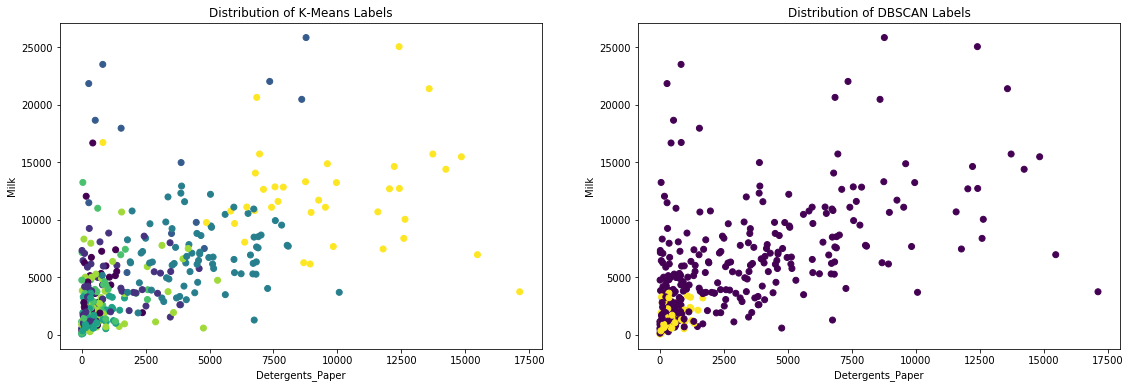

In [43]:

# Create a figure of a fixed size and axes
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (19,6))


# K-Means Labels Scatter Plot
ax1.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels"])
ax1.set_title('Distribution of K-Means Labels')
ax1.set_xlabel('Detergents_Paper')
ax1.set_ylabel('Milk')

#DBSCAN Labels Scatter Plot
ax2.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels_DBSCAN"])
ax2.set_title('Distribution of DBSCAN Labels')
ax2.set_xlabel('Detergents_Paper')
ax2.set_ylabel('Milk')


plt.show()

#Paolo: yes!, here you could define a function for plotting so to avoid to reuse identical code
# also below

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

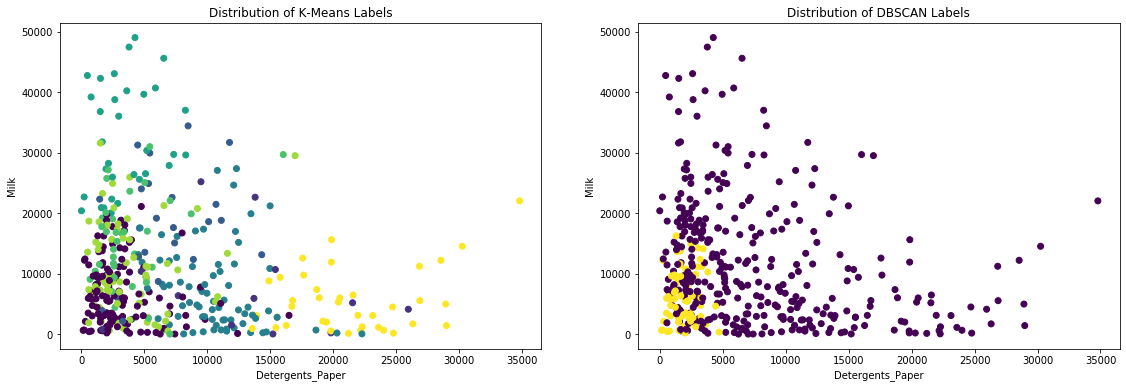

In [22]:
# Your code here:

# Create a figure of a fixed size and axes
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (19,6))


# K-Means Labels Scatter Plot
ax1.scatter(x=customer["Grocery"], y=customer["Fresh"], c=customer["labels"])
ax1.set_title('Distribution of K-Means Labels')
ax1.set_xlabel('Detergents_Paper')
ax1.set_ylabel('Milk')

#DBSCAN Labels Scatter Plot
ax2.scatter(x=customer["Grocery"], y=customer["Fresh"], c=customer["labels_DBSCAN"])
ax2.set_title('Distribution of DBSCAN Labels')
ax2.set_xlabel('Detergents_Paper')
ax2.set_ylabel('Milk')


plt.show()



Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

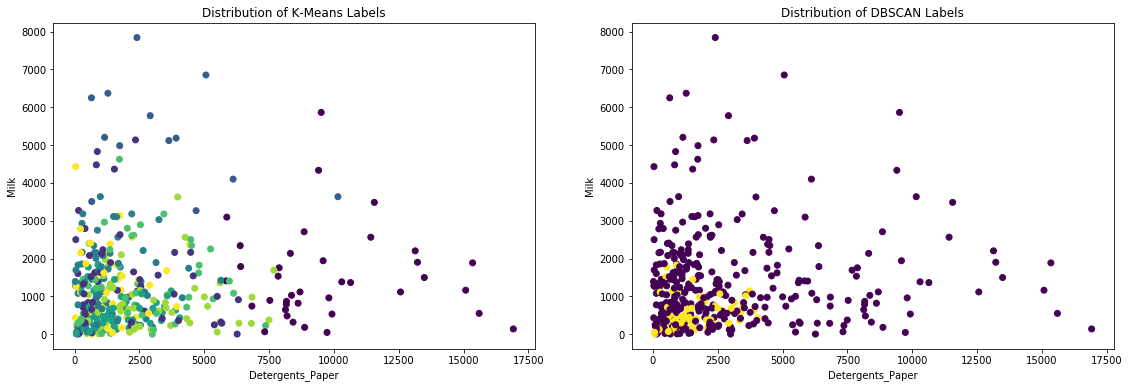

In [44]:
# Your code here:

# Create a figure of a fixed size and axes
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (19,6))


# K-Means Labels Scatter Plot
ax1.scatter(x=customer["Frozen"], y=customer["Delicassen"], c=customer["labels"])
ax1.set_title('Distribution of K-Means Labels')
ax1.set_xlabel('Detergents_Paper')
ax1.set_ylabel('Milk')

#DBSCAN Labels Scatter Plot
ax2.scatter(x=customer["Frozen"], y=customer["Delicassen"], c=customer["labels_DBSCAN"])
ax2.set_title('Distribution of DBSCAN Labels')
ax2.set_xlabel('Detergents_Paper')
ax2.set_ylabel('Milk')


plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [24]:
# Your code here:

customer.groupby(['labels','labels_DBSCAN']).mean()


Channel    Region         Fresh          Milk  \
labels labels_DBSCAN                                                   
0      -1             1.000000  2.949153   7451.423729   3449.661017   
        0             1.000000  3.000000   6218.647887   1521.352113   
1      -1             1.583333  2.250000   7743.666667  16914.000000   
2      -1             1.217391  2.956522  17688.956522   5422.608696   
3      -1             1.973684  2.802632   7517.526316   6681.276316   
4      -1             1.062500  2.875000  32419.250000   3111.000000   
5      -1             1.085714  2.714286  15024.628571   3738.342857   
6      -1             1.028986  1.231884  10299.710145   2717.173913   
7      -1             2.000000  2.378378   5633.783784  12218.513514   

                           Grocery       Frozen  Detergents_Paper   Delicassen  
labels labels_DBSCAN                                                            
0      -1              4431.389831  1889.237288       1036.118644   917.745763  
        0              1940.478873  1428.915493        410.788732   565.563380  
1      -1             13408.833333  3372.583333       3741.250000  5243.166667  
2      -1              6614.043478  2609.043478       1555.217391  3544.826087  
3      -1             10476.394737  1166.315789       4700.315789  1124.868421  
4      -1              3461.625000  2752.843750        489.718750  1043.875000  
5      -1              3894.171429  9920.714286        471.600000  1267.485714  
6      -1              3904.347826  2385.086957        905.913043   896.768116  
7      -1             21515.810811  1452.270270       9722.000000  1314.135135

In [45]:
customer.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.078947,2.736842,15358.131579,3798.710526,3934.605263,9789.815789,547.894737,1517.236842,-1.0
1,1.000000,2.923077,6894.046154,3592.230769,4504.276923,1747.276923,988.846154,1266.646154,-1.0
2,1.615385,2.307692,8887.615385,16029.076923,12931.076923,3414.307692,3590.153846,5238.692308,-1.0
3,1.962500,2.837500,8359.762500,6806.662500,10554.650000,1171.387500,4599.212500,1240.475000,-1.0
4,1.000000,3.000000,6218.647887,1521.352113,1940.478873,1428.915493,410.788732,565.563380,0.0
5,1.046512,2.860465,29880.767442,3256.186047,4013.209302,2594.744186,652.697674,1361.651163,-1.0
6,1.045455,1.196970,10317.772727,2656.606061,3701.212121,2482.424242,910.712121,840.333333,-1.0
7,1.973684,2.342105,5559.368421,12180.263158,21358.500000,1450.210526,9619.526316,1342.394737,-1.0


In [26]:
customer.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.379009,2.45481,11641.819242,5565.478134,7822.857143,2781.938776,2779.647230,1377.119534,3.6793
0,1.000000,3.00000,6218.647887,1521.352113,1940.478873,1428.915493,410.788732,565.563380,0.0000


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# I think for this customer data, K-means looks like a better algorithm. 
# Since there is a wide variety of data, it may not be that accurate to have DBSCAN as it clustered into 2 lables.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

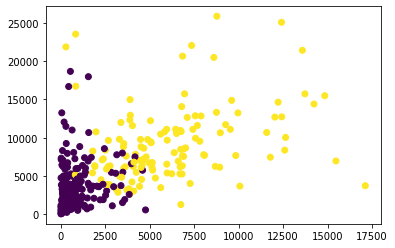

In [65]:
# Your code here

from sklearn.cluster import KMeans

# KMeans for n_clusters=2
customer_kmeans = KMeans(n_clusters=2).fit(scaled_customer)
customer['labels'] = customer_kmeans.labels_

plt.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels"])
plt.show()

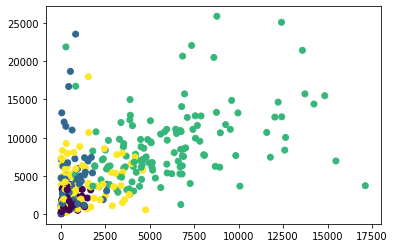

In [47]:
# KMeans for n_clusters=4
customer_kmeans = KMeans(n_clusters=4).fit(scaled_customer)
customer['labels'] = customer_kmeans.labels_

plt.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels"])
plt.show()

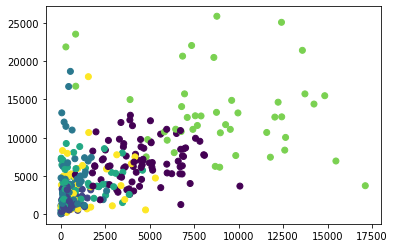

In [48]:
# KMeans for n_clusters=6
customer_kmeans = KMeans(n_clusters=6).fit(scaled_customer)
customer['labels'] = customer_kmeans.labels_

plt.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels"])
plt.show()

In [66]:
# Your comment here

# From the above 3 plots with n_clusters values 2, 4 and 6, it looks like the lower the number of clusters the better it looks.
# I am not fully sure though.
# Paolo: yes, I have the same impression for example for k=2 it identifies very clear clusters

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

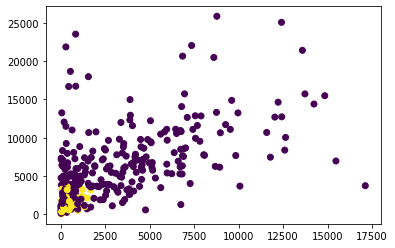

In [68]:
# Your code here
# eps of 0.5 is the default


# DBSCAN for eps = 0.2

from sklearn.cluster import DBSCAN

customer_clustering = DBSCAN(eps=0.2).fit(scaled_customer)

plt.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels"])
plt.show()
#Paolo: be careful, I think here you are plotting the wrong labels, 
#should be the ones for dbscan instead you use the ones for kmeans

# yes, you could add a colorbar to identify the labels as in

#plt.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels"],cmap='veridis')
#plt.colorbar()

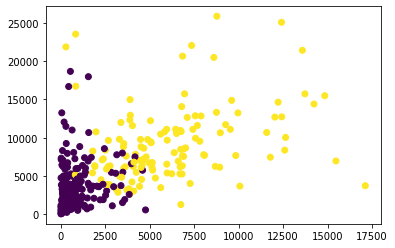

In [70]:
# DBSCAN for eps = 0.6

from sklearn.cluster import DBSCAN

customer_clustering = DBSCAN(eps=0.6).fit(scaled_customer)

plt.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels"])
plt.show()
#Paolo: be careful, I think here you are plotting the wrong labels

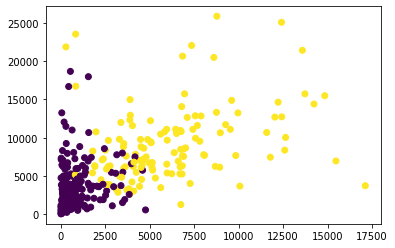

In [73]:
# DBSCAN for eps = 0.8

from sklearn.cluster import DBSCAN

customer_clustering = DBSCAN(eps=0.8).fit(scaled_customer)

plt.scatter(x=customer["Detergents_Paper"], y=customer["Milk"], c=customer["labels"])
plt.show()
#Paolo: be careful, I think here you are plotting the wrong labels

In [ ]:
# Your comment here

# From the above 3 plots with eps values 0.2, 0.6 and 0.8:
# I find it very hard to say which one is better just based on the visualization


#Paolo: yes, it is not easy because it is an unsupervised problem we do not have a test set.
# However for example the dbscan has labelled a lot of data as (-1) which means that it   
# identifies many samples as noise, cannot cluster them properly. 
# See here https://scikit-learn.org/stable/modules/clustering.html#dbscan
# For Kmeans you could play with K and use the 'elbow method' to choose the optimal k. Have a look here 
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html